### Introduction:

Here we will try to predict the gender of a high school student, based on factors such as marks scored, parents' level of education, ethnicity etc.

For our initial data exploration, we shall be using the **Pandas_Profiling** feature and then for our classification, we shall be using the **PyCaret** library.

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('StudentsPerformance.csv')

In [4]:
# generating the report
profile = ProfileReport(df, title='EDA of high school students')

In [6]:
profile.to_widgets()

In [7]:
profile.to_notebook_iframe()

Using Pandas-Profiling feature, I already have a basic intuition of my data, without having to specifically check for missing values or find correlations etc. These are a few important points to note:

- **Gender class is well balanced**, with females constituting ~ 52% and males ~ 48%. This means our classification algorithm should perform better as opposed to dealing with an unbalanced class.


- **Reading and writing scores are highly correlated (~95%)**.This means we can create 2 models (one wiith the entire dataset and the other one won't have 'writing score') and see if there's a high difference in accuracy.



### Setting up classifier:

Now that we have an understanding of our data, let's instantiate our classifier and fit our data. 

Also, since reading score and writing score are highly correlated, I shall use 2 classifiers. The first one will contain the entire data, while the second one will omit 'writing_score'

In [9]:
# Importing module and initializing setup

from pycaret.classification import *
# first classifier containing all data
clf1 = setup(data = df, target = 'gender')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3737
1,Target Type,Binary
2,Label Encoded,"female: 0, male: 1"
3,Original Data,"(1000, 8)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.911300,0.000000,0.901900,0.914000,0.906600,0.822200
1,Linear Discriminant Analysis,0.909900,0.969900,0.901900,0.911300,0.905300,0.819400
2,Logistic Regression,0.898400,0.968800,0.893000,0.897400,0.893500,0.796400
3,Ada Boost Classifier,0.882700,0.941100,0.872200,0.883000,0.877000,0.764900
4,CatBoost Classifier,0.882700,0.950200,0.884100,0.875000,0.878500,0.765100
5,Extreme Gradient Boosting,0.874100,0.945800,0.866500,0.873100,0.867900,0.747700
6,Gradient Boosting Classifier,0.872700,0.947100,0.872500,0.866100,0.867000,0.745000
7,K Neighbors Classifier,0.861300,0.921800,0.842900,0.866400,0.853200,0.721800
8,Light Gradient Boosting Machine,0.849800,0.940700,0.857600,0.839600,0.845600,0.699600
9,Random Forest Classifier,0.836900,0.890700,0.797900,0.856300,0.824800,0.672600


In [11]:
# second classifier containing all data except 'writing_score'
clf2 = setup(data = df, target = 'gender',ignore_features = ['writing_score'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8258
1,Target Type,Binary
2,Label Encoded,"female: 0, male: 1"
3,Original Data,"(1000, 8)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.835600,0.911300,0.825600,0.833600,0.828600,0.670700
1,Ridge Classifier,0.832700,0.000000,0.816700,0.834200,0.824400,0.664800
2,Linear Discriminant Analysis,0.832700,0.910900,0.816700,0.834200,0.824400,0.664800
3,K Neighbors Classifier,0.804100,0.881800,0.774800,0.813000,0.790700,0.607000
4,Ada Boost Classifier,0.796900,0.884000,0.769300,0.803100,0.784300,0.592900
5,CatBoost Classifier,0.794100,0.872600,0.790000,0.788100,0.787300,0.587900
6,Gradient Boosting Classifier,0.792600,0.877100,0.781000,0.790700,0.784000,0.584900
7,Light Gradient Boosting Machine,0.789800,0.862200,0.774700,0.788000,0.780200,0.578800
8,Extreme Gradient Boosting,0.786900,0.878700,0.769200,0.786800,0.777200,0.573200
9,Decision Tree Classifier,0.755300,0.754700,0.730300,0.755000,0.740500,0.509500


Okay, so in our case, we are loosing ~ 7% accuracy after omitting the 'writing_score'. So we shall use the entire dataset for our classification.

In [13]:
clf = setup(data = df, target = 'gender')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3314
1,Target Type,Binary
2,Label Encoded,"female: 0, male: 1"
3,Original Data,"(1000, 8)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.899800,0.960700,0.884300,0.907500,0.895100,0.799200
1,Ridge Classifier,0.898400,0.000000,0.881400,0.907100,0.893500,0.796400
2,Logistic Regression,0.889800,0.960700,0.881400,0.890700,0.885300,0.779300
3,Ada Boost Classifier,0.856900,0.926400,0.857700,0.850800,0.852200,0.713600
4,Gradient Boosting Classifier,0.851200,0.929700,0.842900,0.850500,0.845000,0.702000
5,CatBoost Classifier,0.845500,0.933400,0.834100,0.846800,0.838800,0.690500
6,Extreme Gradient Boosting,0.844100,0.929000,0.840000,0.839100,0.838500,0.687800
7,K Neighbors Classifier,0.844000,0.899600,0.822300,0.852400,0.835200,0.687400
8,Light Gradient Boosting Machine,0.835500,0.918800,0.831000,0.830800,0.829500,0.670600
9,SVM - Linear Kernel,0.828300,0.000000,0.863300,0.820400,0.827200,0.657400


### Creating the model

As Linear Discriminant Analysis tops the list, we shall proceed with that.

In [15]:
# creating Linear Discriminant Analysis model
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9429,0.9738,0.9394,0.9394,0.9394,0.8853
1,0.9000,0.9664,0.8485,0.9333,0.8889,0.7984
2,0.8857,0.9518,0.8824,0.8824,0.8824,0.7712
3,0.9000,0.9469,0.8529,0.9355,0.8923,0.7993
4,0.8857,0.9665,0.8824,0.8824,0.8824,0.7712
5,0.8571,0.9322,0.8529,0.8529,0.8529,0.7141
6,0.9286,0.9690,0.8824,0.9677,0.9231,0.8567
7,0.9000,0.9820,0.9412,0.8649,0.9014,0.8003
8,0.9143,0.9624,0.8824,0.9375,0.9091,0.8282
9,0.8841,0.9562,0.8788,0.8788,0.8788,0.7677


### Model Tuning

Let's see if we can see an increase in accuracy after tuning our Linear Discriminant Analysis classifier.

In [16]:
tuned_lda = tune_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9429,0.9787,0.9394,0.9394,0.9394,0.8853
1,0.9143,0.9607,0.8788,0.9355,0.9062,0.8274
2,0.8714,0.9518,0.8824,0.8571,0.8696,0.7429
3,0.8857,0.9485,0.8235,0.9333,0.8750,0.7705
4,0.8857,0.9624,0.8824,0.8824,0.8824,0.7712
5,0.8571,0.9363,0.8529,0.8529,0.8529,0.7141
6,0.9286,0.9698,0.9118,0.9394,0.9254,0.8569
7,0.8714,0.9804,0.8824,0.8571,0.8696,0.7429
8,0.9000,0.9681,0.8824,0.9091,0.8955,0.7997
9,0.8986,0.9512,0.8788,0.9062,0.8923,0.7965


So tuning the model doesn't really help here. Infact, the mean accuracy actually went down by ~.0042% after tuning.

### Stacking Models:

From the initial comparision of all our classifiers, we see that **Linear Discriminant Analysis, Ridge Classifier and Logistic Regression** are the top 3. Let's stack all these 3 and see if we can obtain better statistics.
    

In [17]:
# creating multiple models for blending

lda = create_model('lda')
ridge = create_model('ridge')
lr = create_model('lr')

stacker = stack_models(estimator_list = [lda, ridge, lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9143,0.9779,0.9394,0.8857,0.9118,0.8286
1,0.9143,0.9615,0.8788,0.9355,0.9062,0.8274
2,0.8714,0.9526,0.8824,0.8571,0.8696,0.7429
3,0.8857,0.9453,0.8235,0.9333,0.8750,0.7705
4,0.8857,0.9624,0.8824,0.8824,0.8824,0.7712
5,0.8286,0.9297,0.8529,0.8056,0.8286,0.6574
6,0.9143,0.9690,0.8529,0.9667,0.9062,0.8279
7,0.8857,0.9796,0.9118,0.8611,0.8857,0.7716
8,0.9143,0.9624,0.8824,0.9375,0.9091,0.8282
9,0.8841,0.9461,0.8788,0.8788,0.8788,0.7677


So stacking doesn't help our case either, as the mean accuracy went down here as well.

### Predictions:

Although our initial 'LDA' model seems to be the best in terms of accuracy, let's see how well all the classifier does on our holdout test set.

In [18]:
#predictions using ridge classifier

predict_model(ridge).head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.9336,0,0.9241,0.9371,0.9306,0.8669


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1


In [19]:
#predictions using LDA classifier
predict_model(lda).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.9302,0.9762,0.9241,0.9306,0.9273,0.8602


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label,Score
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0402
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,0.8634
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9983
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.3868
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.9691


In [20]:
#predictions using Logistic Regression classifier
predict_model(lr).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9136,0.9764,0.9103,0.9103,0.9103,0.827


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label,Score
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0507
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,0.9089
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9975
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.4497
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.9652


In [21]:
#predictions using stacking classifier
predict_model(stacker).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.9203,0.9736,0.9103,0.9231,0.9167,0.8402


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label,Score
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0366
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,0.9145
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9951
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.4371
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.9771


From these initial predictions, the ridge classifier seems to outperform the LDA classifier and others, even though LDA was the better performer when using kfold validation earlier. Let's see if the tuned_ridge and tuned_lda models give us better predictions.

In [23]:
#predictions using tuned_ridge classifier
predict_model(tune_model('ridge')).head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.9203,0,0.9103,0.9231,0.9167,0.8402


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1


In [24]:
#predictions using tuned_lda classifier
predict_model(tune_model('lda')).head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.9336,0.9756,0.9172,0.9433,0.9301,0.8668


,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associates degree,parental_level_of_education_bachelors degree,parental_level_of_education_high school,parental_level_of_education_masters degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,gender,Label,Score
0,54.0,64.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0290
1,71.0,66.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,0.8833
2,88.0,75.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9975
3,74.0,72.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.4733
4,61.0,60.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.9557


Interestingly, our initial **ridge classifier and tuned_lda seems to have the highest accuracy.**

### Model Evaluation:

Let's evaluate our model now and look at a few parameters like the decision boundary, AUC curve, confusion matrix etc.

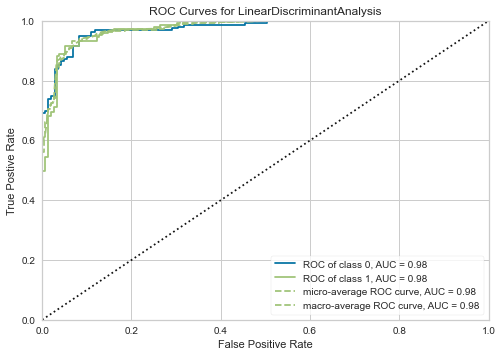

In [26]:
plot_model(tuned_lda)

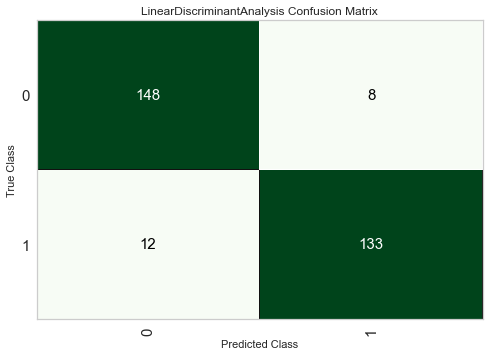

In [27]:
plot_model(tuned_lda, 'confusion_matrix')

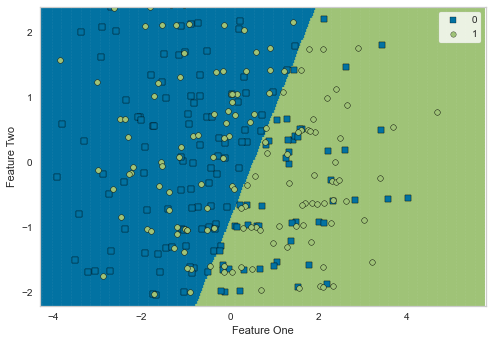

In [28]:
plot_model(tuned_lda, 'boundary')

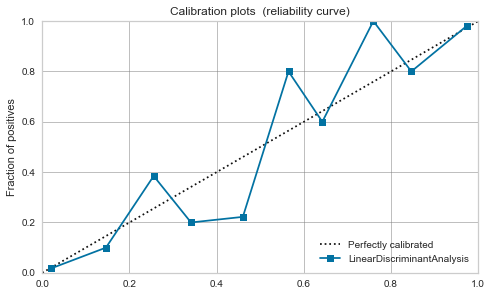

In [29]:
plot_model(tuned_lda, 'calibration')

### Conclusion:

For our classification problem, we decided to move forward with our tuned_lda model. Here are some thoughts that can be tried out to see if it helps in increasing our classifier's accuracy
- Use feature engineering to combine similar variables.
    - Take the average of all the 3 scores and use the average score as opposed to using 3 individual scores.
    - Take the log or inverse of the data to see if that enhances model accuracy.
- Generate synthetic data to test our classifier on unseen data
    - For numeric data:
        - Check if all the 3 scores follow a normal distribution (we can check this using the Shapiro-Wilk test), then we can create new data using the mean and the standard deviations of these distributions. 
    - For the categorical data:
        - Assuming that the categories are random independent variables, we can create the necessary categories.
-----------------------------------------------------------------------------------------------------------------------------        
****Please note that the same data can be treated as a regression problem as well, where we can predict the scores based on the other factors in the data****